# Setup

In [1]:
# Clone the repository to access the text file containing package requirements
!git clone https://github.com/Julie0827/CSE151A-Project.git

Cloning into 'CSE151A-Project'...


In [2]:
# Download data MAC
!mkdir -p data/
!curl -o data/BitcoinHeistData.zip https://archive.ics.uci.edu/static/public/526/bitcoinheistransomwareaddressdataset.zip
!unzip -n data/BitcoinHeistData.zip -d data/
!rm data/BitcoinHeistData.zip

The syntax of the command is incorrect.
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0Warning: Failed to open the file data/BitcoinHeistData.zip: No such file or 

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
curl: (23) Failure writing output to destination, passed 4021 returned 4294967295
'unzip' is not recognized as an internal or external command,
operable program or batch file.
'rm' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
# Install required packages MAC
!pip3 install -r CSE151A-Project/requirements.txt

'pip3' is not recognized as an internal or external command,
operable program or batch file.


In [7]:
# Download data WINDOWS
!Mkdir data
!curl -o data/BitcoinHeistData.zip https://archive.ics.uci.edu/static/public/526/bitcoinheistransomwareaddressdataset.zip
!tar -xf data/BitcoinHeistData.zip -C data/
!del data\BitcoinHeistData.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 3983k    0 3983k    0     0  4740k      0 --:--:-- --:--:-- --:--:-- 4748k
100 11.1M    0 11.1M    0     0  6214k      0 --:--:--  0:00:01 --:--:-- 6217k
100 18.4M    0 18.4M    0     0  6649k      0 --:--:--  0:00:02 --:--:-- 6652k
100 23.5M    0 23.5M    0     0  6287k      0 --:--:--  0:00:03 --:--:-- 6290k
100 30.4M    0 30.4M    0     0  6438k      0 --:--:--  0:00:04 --:--:-- 6440k
100 37.6M    0 37.6M    0     0  6596k      0 --:--:--  0:00:05 --:--:-- 6908k
100 44.8M    0 44.8M    0     0  6720k      0 --:--:--  0:00:06 --:--:-- 6905k
100 52.5M    0 52.5M    0     0  6861k      0 --:--:--  0:00:07 --:--:-- 6981k
100 59.9M    0 59.9M    0     0  6940k      0 --:--:--  0:00:08 --:--:-- 7441k
100 64.9M    0 64.9M    0     0  6761k      0 --:--

In [ ]:
# Install required packages WINDOWS
!py -m pip install -r CSE151A-Project/requirements.txt

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.svm import OneClassSVM

from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# new scaler to minimize outlier effect
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer

# Data Exploration

### Basic Information

In [9]:
bitcoindf = pd.read_csv('data/BitcoinHeistData.csv')

print(f'Instance Count: {bitcoindf.shape[0]}')
print(f'Feature Count: {bitcoindf.shape[1]}')

non_ransomware_count = bitcoindf['label'].value_counts().get('white', 0)
ransomware_count = bitcoindf.shape[0] - non_ransomware_count

print(f'\nNon-Ransomware Transaction Count: {non_ransomware_count}')
print(f'Ransomware Transaction Count: {ransomware_count}')

print('\nFeature Types:')
print(bitcoindf.dtypes)

print('\nDescriptive Statistics:')
display(bitcoindf.describe().round(2))

Instance Count: 2916697
Feature Count: 10

Non-Ransomware Transaction Count: 2875284
Ransomware Transaction Count: 41413

Feature Types:
address       object
year           int64
day            int64
length         int64
weight       float64
count          int64
looped         int64
neighbors      int64
income       float64
label         object
dtype: object

Descriptive Statistics:


,year,day,length,weight,count,looped,neighbors,income
count,2916697.00,2916697.00,2916697.00,2916697.00,2916697.00,2916697.00,2916697.00,2.916697e+06
mean,2014.48,181.46,45.01,0.55,721.64,238.51,2.21,4.464889e+09
std,2.26,104.01,58.98,3.67,1689.68,966.32,17.92,1.626860e+11
min,2011.00,1.00,0.00,0.00,1.00,0.00,1.00,3.000000e+07
25%,2013.00,92.00,2.00,0.02,1.00,0.00,1.00,7.428559e+07
50%,2014.00,181.00,8.00,0.25,1.00,0.00,2.00,1.999985e+08
75%,2016.00,271.00,108.00,0.88,56.00,0.00,2.00,9.940000e+08
max,2018.00,365.00,144.00,1943.75,14497.00,14496.00,12920.00,4.996440e+13


### Pairplot

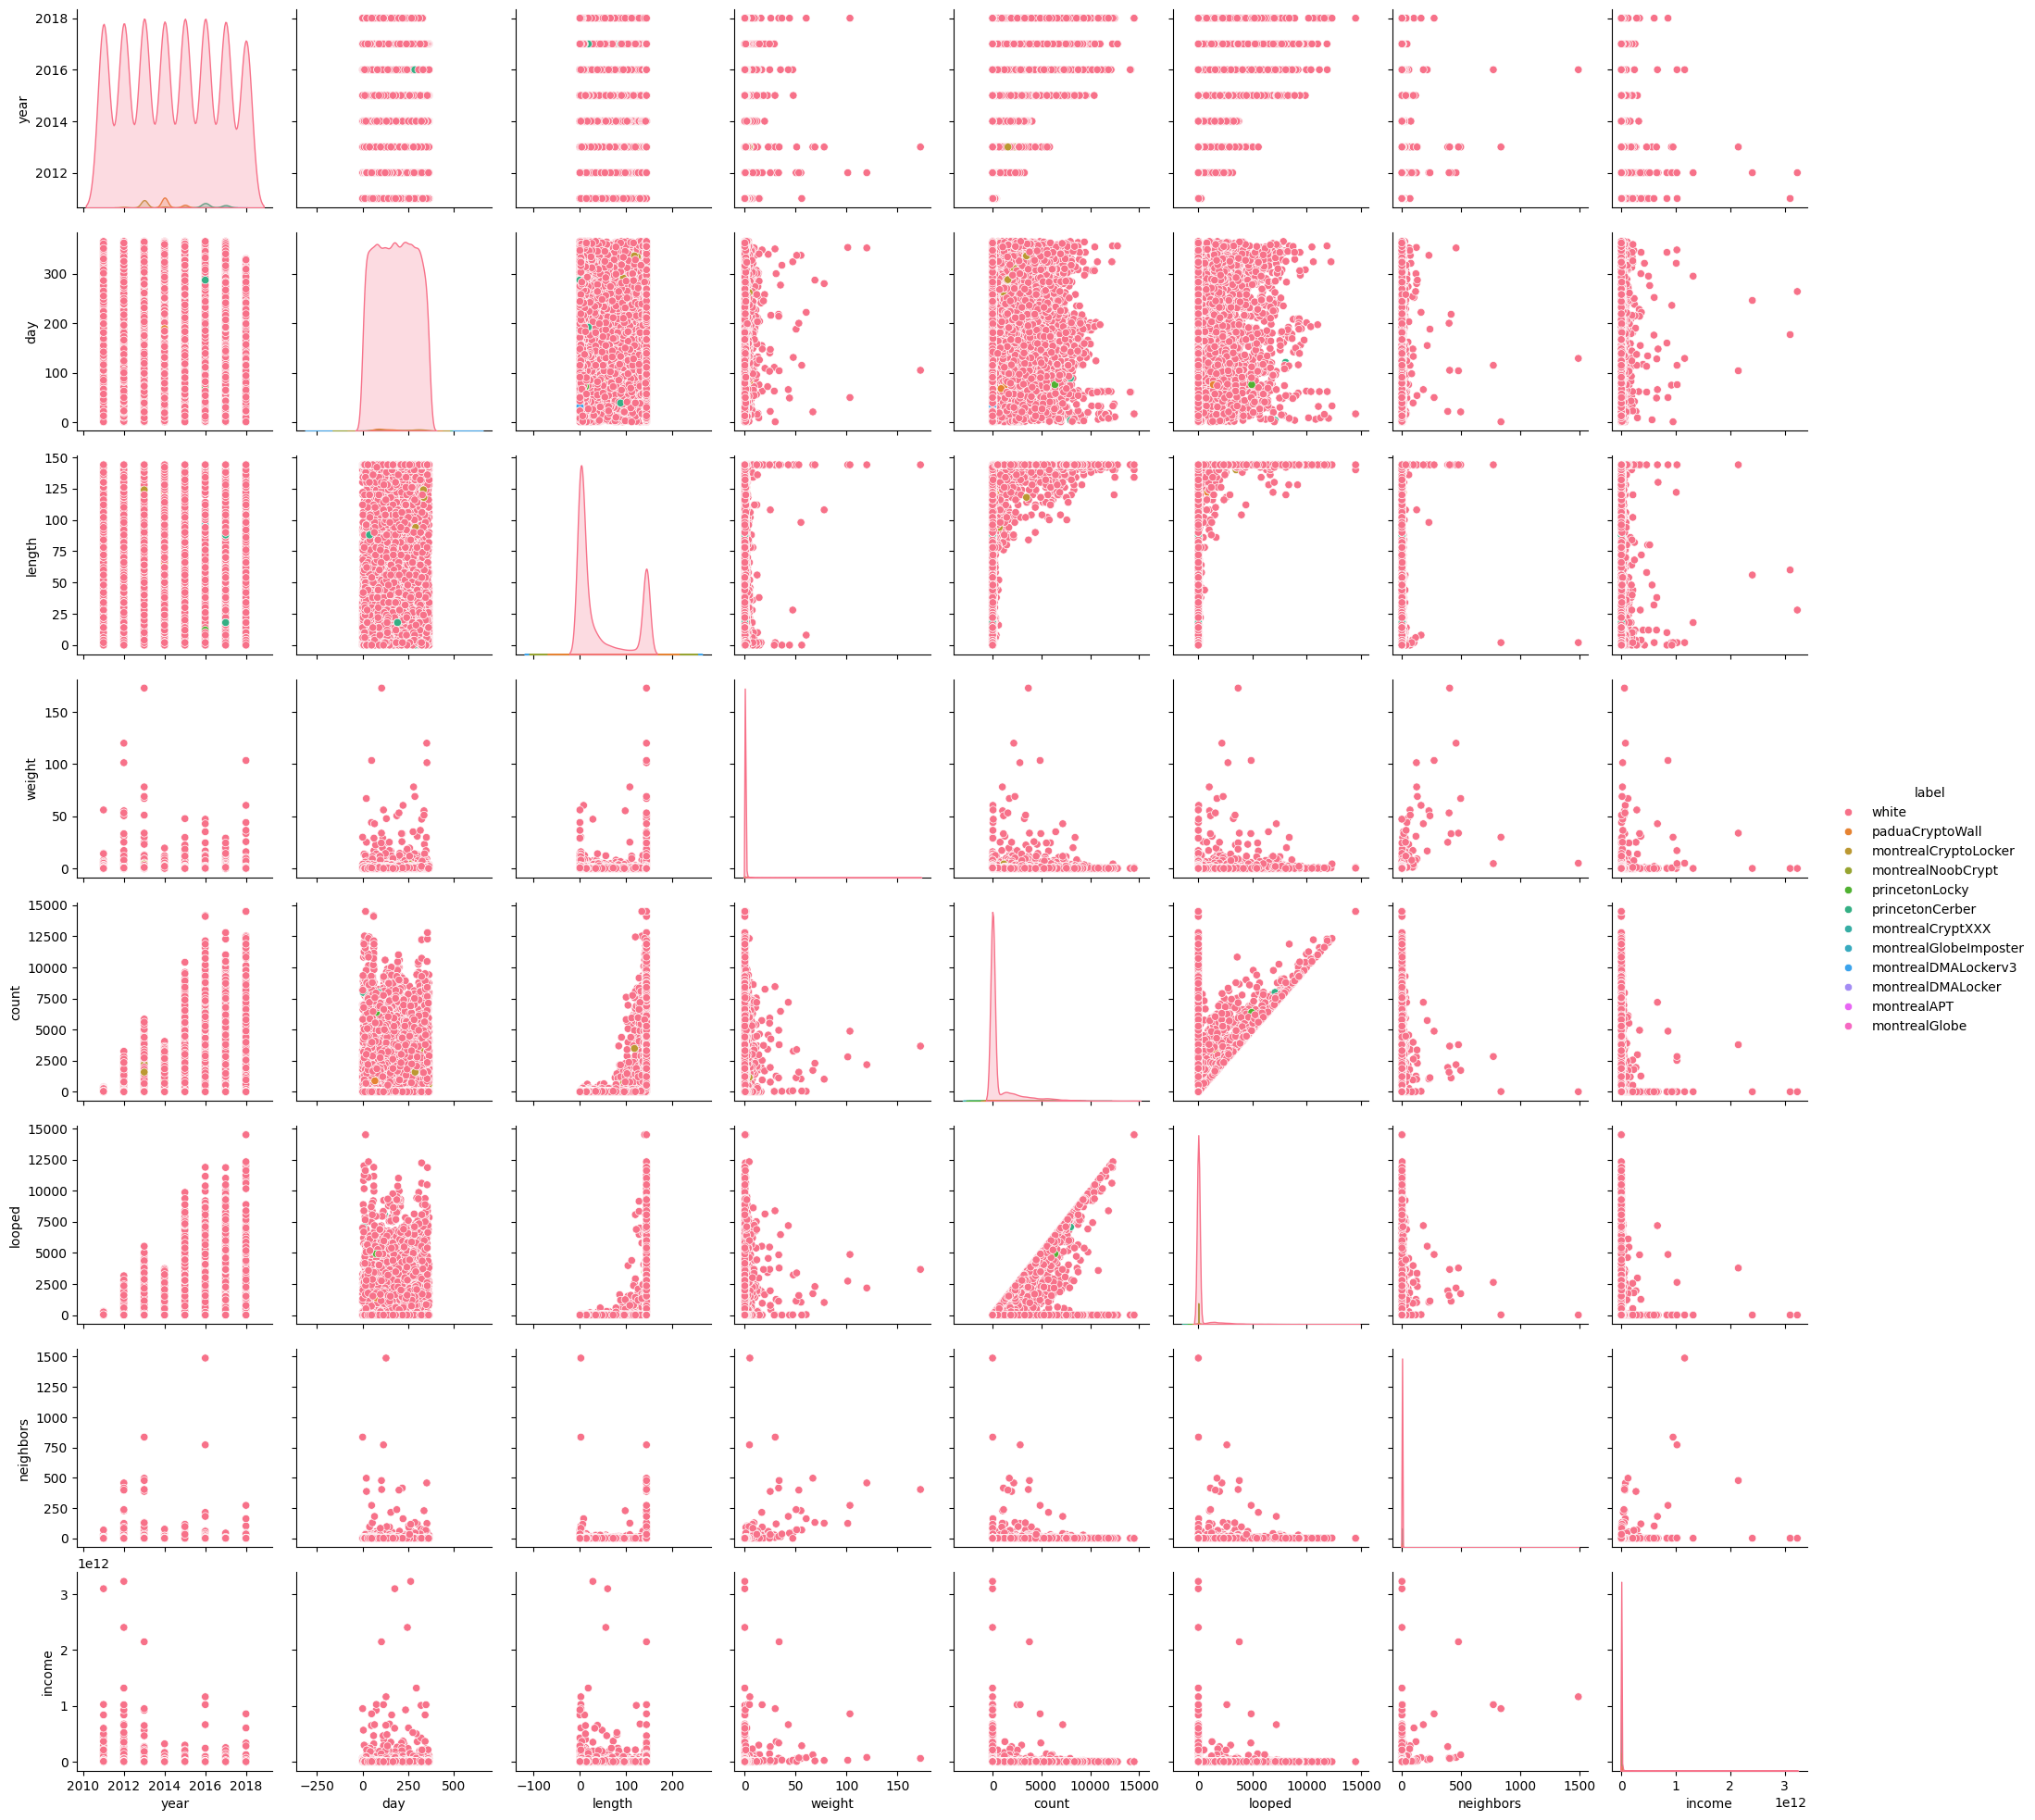

In [ ]:
# Create a pairplot with sample size of 30000
sns.pairplot(bitcoindf.drop(columns=['address']).sample(30000), hue='label', diag_kind='kde')

### Correlation Heatmap

<Axes: >

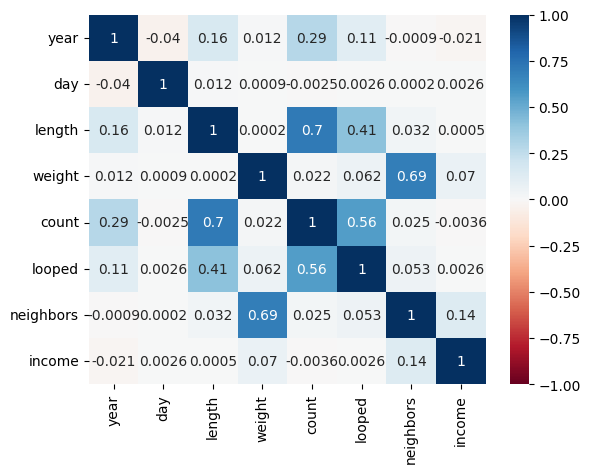

In [ ]:
# Create a Pearson correlation matrix plot in the form of a heatmap
corr = bitcoindf.drop(columns=['address', 'label']).corr().round(4)
sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')

# Data Preprocessing

### Drop the `address`, `year`, and `day` columns & Encode the `label` column

In [10]:
print('Dataset BEFORE dropping the address, year, and day columns:')
display(bitcoindf.head())

# Drop the address, year, and day columns
bitcoindf = bitcoindf.drop(columns=['address', 'year', 'day'])

print('\nDataset AFTER dropping the address, year, and day columns:')
display(bitcoindf.head())

Dataset BEFORE dropping the address, year, and day columns:


,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,100050000.0,princetonCerber
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,100000000.0,princetonLocky
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,200000000.0,princetonCerber
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,71200000.0,princetonCerber
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,200000000.0,princetonLocky



Dataset AFTER dropping the address, year, and day columns:


,length,weight,count,looped,neighbors,income,label
0,18,0.008333,1,0,2,100050000.0,princetonCerber
1,44,0.000244,1,0,1,100000000.0,princetonLocky
2,0,1.000000,1,0,2,200000000.0,princetonCerber
3,72,0.003906,1,0,2,71200000.0,princetonCerber
4,144,0.072848,456,0,1,200000000.0,princetonLocky


### Encode the `label` column

In [11]:
print(f'\nUnique labels in the label column BEFORE encoding: {bitcoindf.label.unique()}')

# Encode the label column: convert all non-white labels to 1 and all white labels to 0
bitcoindf['label'] = bitcoindf['label'].apply(lambda x: 0 if x == 'white' else 1)

print(f'\nUnique labels in the label column AFTER encoding: {bitcoindf.label.unique()}')


Unique labels in the label column BEFORE encoding: ['princetonCerber' 'princetonLocky' 'montrealCryptoLocker'
 'montrealCryptXXX' 'paduaCryptoWall' 'montrealWannaCry'
 'montrealDMALockerv3' 'montrealCryptoTorLocker2015' 'montrealSamSam'
 'montrealFlyper' 'montrealNoobCrypt' 'montrealDMALocker' 'montrealGlobe'
 'montrealEDA2' 'paduaKeRanger' 'montrealVenusLocker' 'montrealXTPLocker'
 'paduaJigsaw' 'montrealGlobev3' 'montrealJigSaw' 'montrealXLockerv5.0'
 'montrealXLocker' 'montrealRazy' 'montrealCryptConsole'
 'montrealGlobeImposter' 'montrealSam' 'montrealComradeCircle'
 'montrealAPT' 'white']

Unique labels in the label column AFTER encoding: [1 0]


## Feature expansion and rescaling via power transform

### Scaling with power transform and expanding features with polynomial features

In [12]:
from sklearn.preprocessing import PolynomialFeatures

In [13]:
# Divide the dataset into X and y
X = bitcoindf.drop(['label'], axis=1)
y = bitcoindf.label

deg_3 = PolynomialFeatures(degree=(1,3),interaction_only=True)

X = deg_3.fit_transform(X)

scaler = PowerTransformer()

X_d3_power = scaler.fit_transform(X)
X_d3_power = pd.DataFrame(X_d3_power)

print('AFTER rescaled and expanded:')
display(X_d3_power.describe().round(3))

AFTER rescaled and expanded:


,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
count,2916697.0,2916697.000,2916697.000,2916697.000,2916697.000,2916697.000,2916697.000,2916697.000,2916697.000,2916697.000,...,2916697.000,2916697.000,2916697.000,2916697.000,2916697.000,2916697.000,2916697.000,2916697.000,2916697.000,2916697.000
mean,0.0,0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,...,-0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000
std,0.0,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,0.0,-1.310,-1.186,-0.751,-0.399,-1.378,-1.683,-0.950,-1.200,-0.402,...,-0.373,-1.144,-2.922,-0.360,-0.402,-2.654,-0.399,-0.405,-1.754,-0.405
25%,0.0,-0.698,-1.069,-0.751,-0.399,-1.378,-0.812,-0.950,-0.744,-0.402,...,-0.373,-0.824,-0.432,-0.360,-0.402,-0.502,-0.399,-0.405,-0.884,-0.405
50%,0.0,-0.106,-0.125,-0.751,-0.399,0.483,-0.055,-0.289,-0.150,-0.402,...,-0.373,-0.255,-0.093,-0.360,-0.402,0.056,-0.399,-0.405,-0.077,-0.405
75%,0.0,1.167,1.094,1.095,-0.399,0.483,0.847,0.902,0.927,-0.402,...,-0.373,0.573,0.483,-0.360,-0.402,0.549,-0.399,-0.405,0.932,-0.405
max,0.0,1.306,2.509,1.684,2.698,3.847,2.625,1.904,1.618,2.583,...,2.835,1.935,8.865,2.997,2.509,22.686,2.629,2.473,2.631,2.470


### Splitting data

In [22]:
X_train_d3, X_test_d3, y_train_d3, y_test_d3 = train_test_split(X_d3_power, y, test_size=0.2, random_state=0)

### Undersampling Degree 3 data

In [15]:

print('\nBefore undersampling:')
print('Count of majority class data points in training set:', y_train_d3.shape[0] - y_train_d3.sum())
print('Count of minority class data points in training set: ', y_train_d3.sum())

# Undersample
random_under_sampler = RandomUnderSampler(sampling_strategy=1, random_state=10)
X_train_undersampled_d3, y_train_undersampled_d3 = random_under_sampler.fit_resample(X_train_d3, y_train_d3)

print('\nAfter undersampling:')
print('Count of majority class data points in training set:', y_train_undersampled_d3.shape[0] - y_train_undersampled_d3.sum())
print('Count of minority class data points in training set:', y_train_undersampled_d3.sum())


Before undersampling:
Count of majority class data points in training set: 2300150
Count of minority class data points in training set:  33207

After undersampling:
Count of majority class data points in training set: 33207
Count of minority class data points in training set: 33207


### Storing undersampled degree 3 data in csv

In [16]:
X_train_undersampled_d3.to_csv('data/BitcoinX_ut_d3.csv', index=False)
y_train_undersampled_d3.to_csv('data/BitcoinY_ut_d3.csv', index=False)


###  Over and Undersample with degree 3 data

In [17]:
# OVERSAMPLE
print('\nBefore undersampling:')
print('Count of majority class data points in training set:', y_train_d3.shape[0] - y_train_d3.sum())
print('Count of minority class data points in training set: ', y_train_d3.sum())

# Undersample
random_under_sampler = RandomUnderSampler(sampling_strategy=.25, random_state=10)
X_train_OvUn_d3, y_train_OvUn_d3 = random_under_sampler.fit_resample(X_train_d3, y_train_d3)

print('\nAfter undersampling:')
print('Count of majority class data points in training set:', y_train_OvUn_d3.shape[0] - y_train_OvUn_d3.sum())
print('Count of minority class data points in training set:', y_train_OvUn_d3.sum())

randomOver = RandomOverSampler(sampling_strategy=1, random_state=10)
X_train_OvUn_d3, y_train_OvUn_d3 = randomOver.fit_resample(X_train_OvUn_d3, y_train_OvUn_d3)

print('Count of majority class data points in training set:', y_train_OvUn_d3.shape[0] - y_train_OvUn_d3.sum())
print('Count of minority class data points in training set:', y_train_OvUn_d3.sum())


Before undersampling:
Count of majority class data points in training set: 2300150
Count of minority class data points in training set:  33207

After undersampling:
Count of majority class data points in training set: 132828
Count of minority class data points in training set: 33207
Count of majority class data points in training set: 132828
Count of minority class data points in training set: 132828


### Total amount of testing data

In [18]:
print('Count of majority class data points in testing set:', y_test_d3.shape[0] - y_test_d3.sum())
print('Count of minority class data points in testing set:', y_test_d3.sum())

Count of majority class data points in testing set: 575134
Count of minority class data points in testing set: 8206


### Storing over/under sampled degree 3 data in csv

In [19]:
X_train_OvUn_d3.to_csv('data/BitcoinX_ou_d3.csv', index=False)
y_train_OvUn_d3.to_csv('data/BitcoinY_ou_d3.csv', index=False)

### Storing non over/under sampled degree 3 data in csv For other model notebooks


In [20]:
X_train_d3.to_csv('data/BTCX_NoUS_d3.csv', index=False)
y_train_d3.to_csv('data/BTCy_NoUS_d3.csv', index=False)

### The test data was unchanged in the sampling so we can store the test data for all 3 in the same file

In [21]:
X_test_d3.to_csv('data/BitcoinX_test_d3.csv', index=False)
y_test_d3.to_csv('data/BitcoinY_test_d3.csv', index=False)